In [4]:
import pandas as pd
data=pd.read_csv("C:/Users/HKD81/Desktop/E-commerce Analytics project/Data/kz.csv")
data

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2.294360e+18,1.515970e+18,2.268110e+18,electronics.tablet,samsung,162.01,1.515920e+18
1,2020-04-24 11:50:39 UTC,2.294360e+18,1.515970e+18,2.268110e+18,electronics.tablet,samsung,162.01,1.515920e+18
2,2020-04-24 14:37:43 UTC,2.294440e+18,2.273950e+18,2.268110e+18,electronics.audio.headphone,huawei,77.52,1.515920e+18
3,2020-04-24 14:37:43 UTC,2.294440e+18,2.273950e+18,2.268110e+18,electronics.audio.headphone,huawei,77.52,1.515920e+18
4,2020-04-24 19:16:21 UTC,2.294580e+18,2.273950e+18,2.268110e+18,NaN,karcher,217.57,1.515920e+18
...,...,...,...,...,...,...,...,...
1048570,2020-05-12 07:16:25 UTC,2.353220e+18,1.515970e+18,NaN,57.87,NaN,NaN,NaN
1048571,2020-05-12 07:08:37 UTC,2.353220e+18,1.515970e+18,2.268110e+18,electronics.smartphone,oppo,231.23,NaN
1048572,2020-05-12 09:11:47 UTC,2.353220e+18,2.273950e+18,2.268110e+18,appliances.kitchen.refrigerators,samsung,520.81,NaN
1048573,2020-05-12 06:43:09 UTC,2.353220e+18,1.515970e+18,2.268110e+18,NaN,rowenta,55.53,NaN


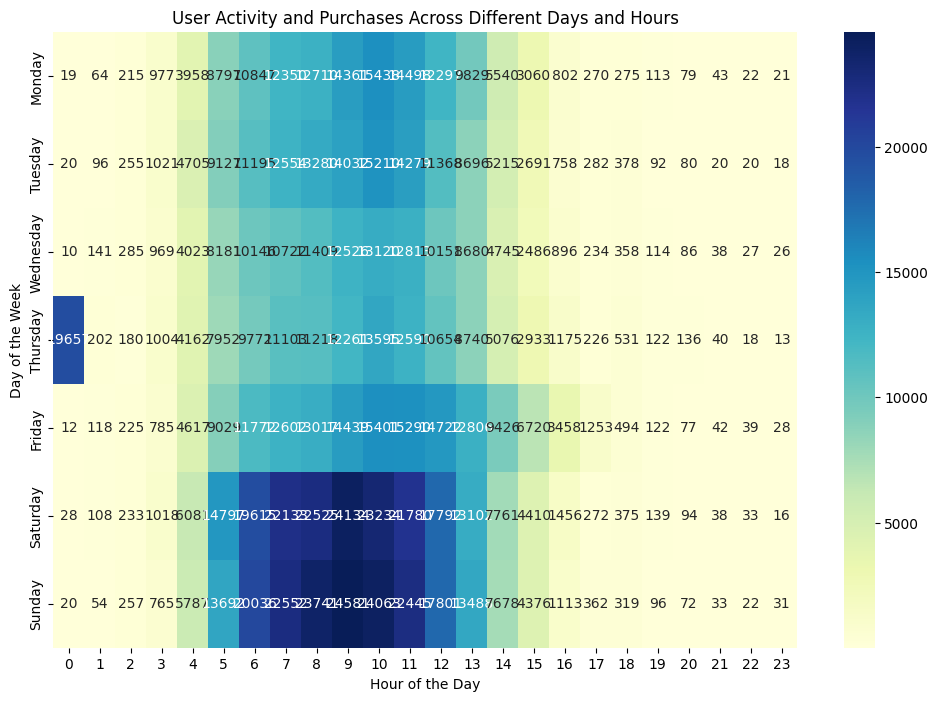

In [2]:
#Time-based Analysis
# 1-To analyze the peak times for user activity and purchases across different days of the week
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/HKD81/Desktop/E-commerce Analytics project/Data/kz.csv')

df['event_time'] = pd.to_datetime(df['event_time'])
df['day_of_week'] = df['event_time'].dt.day_name()
df['hour'] = df['event_time'].dt.hour

# Group by day of the week and hour to count the number of activities (events)
activity_counts = df.groupby(['day_of_week', 'hour']).size().reset_index(name='activity_count')

# Pivot the table to get hours as columns and days of the week as rows
activity_pivot = activity_counts.pivot(index='day_of_week', columns='hour', values='activity_count')

# Reorder the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
activity_pivot = activity_pivot.reindex(days_order)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(activity_pivot, cmap='YlGnBu', annot=True, fmt='d')
plt.title('User Activity and Purchases Across Different Days and Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


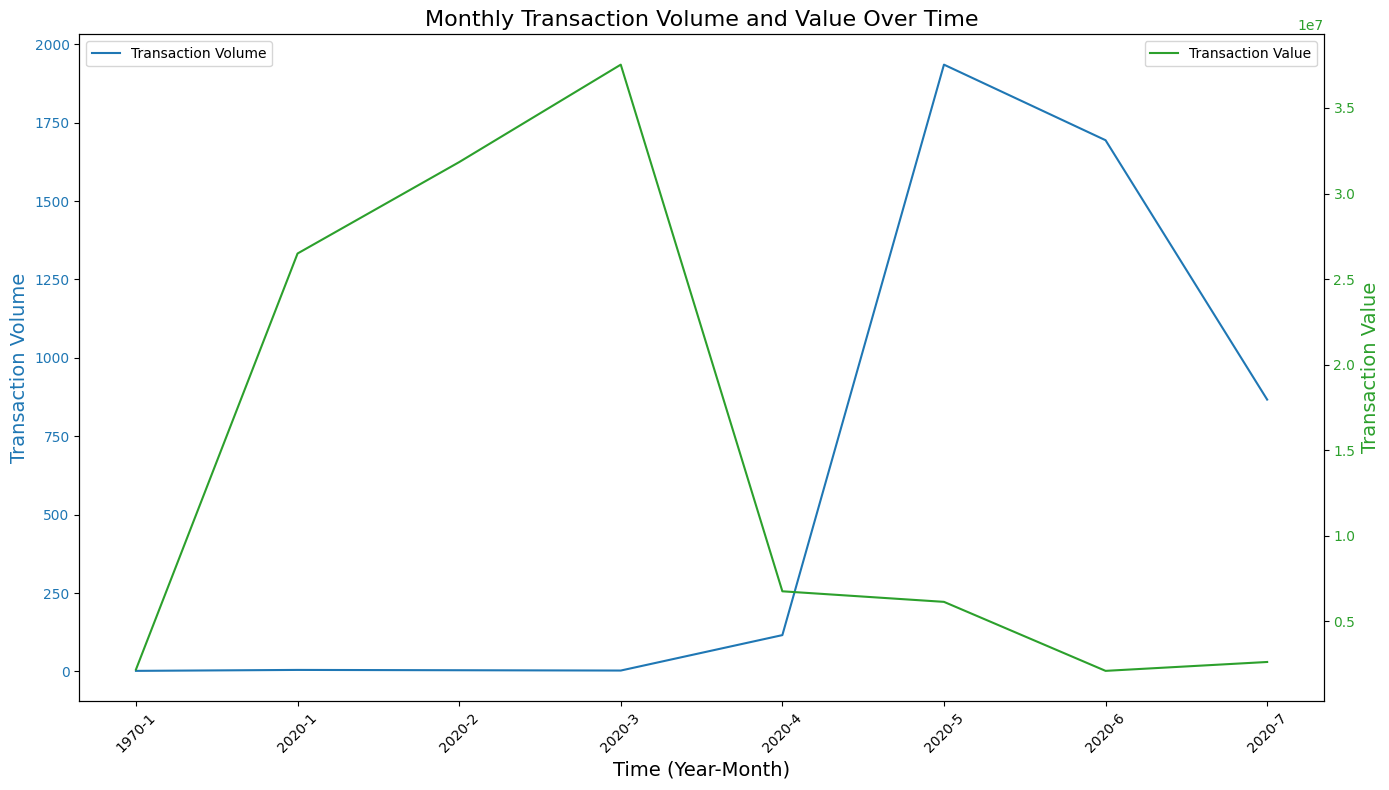

In [3]:
# 2-How do seasonal trends impact the volume and value of transactions over time?
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'ecommerce_data.csv' with your actual file path)
df = pd.read_csv('C:/Users/HKD81/Desktop/E-commerce Analytics project/Data/kz.csv')

# Convert event_time to datetime format
df['event_time'] = pd.to_datetime(df['event_time'])

# Extract month and year from event_time
df['month'] = df['event_time'].dt.month
df['year'] = df['event_time'].dt.year

# Calculate the monthly volume and value of transactions
monthly_data = df.groupby(['year', 'month']).agg({
    'order_id': 'nunique',  # Transaction volume: count of unique orders
    'price': 'sum'          # Transaction value: sum of prices
}).reset_index()

# Rename columns for clarity
monthly_data.columns = ['year', 'month', 'transaction_volume', 'transaction_value']

# Plot the trends over time
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot transaction volume
ax1.set_title('Monthly Transaction Volume and Value Over Time', fontsize=16)
ax1.set_xlabel('Time (Year-Month)', fontsize=14)
ax1.set_ylabel('Transaction Volume', fontsize=14, color='tab:blue')
ax1.plot(monthly_data['year'].astype(str) + '-' + monthly_data['month'].astype(str), 
         monthly_data['transaction_volume'], 
         color='tab:blue', label='Transaction Volume')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.tick_params(axis='x', rotation=45)

# Create a second y-axis to plot transaction value
ax2 = ax1.twinx()
ax2.set_ylabel('Transaction Value', fontsize=14, color='tab:green')
ax2.plot(monthly_data['year'].astype(str) + '-' + monthly_data['month'].astype(str), 
         monthly_data['transaction_value'], 
         color='tab:green', label='Transaction Value')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Show legend
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


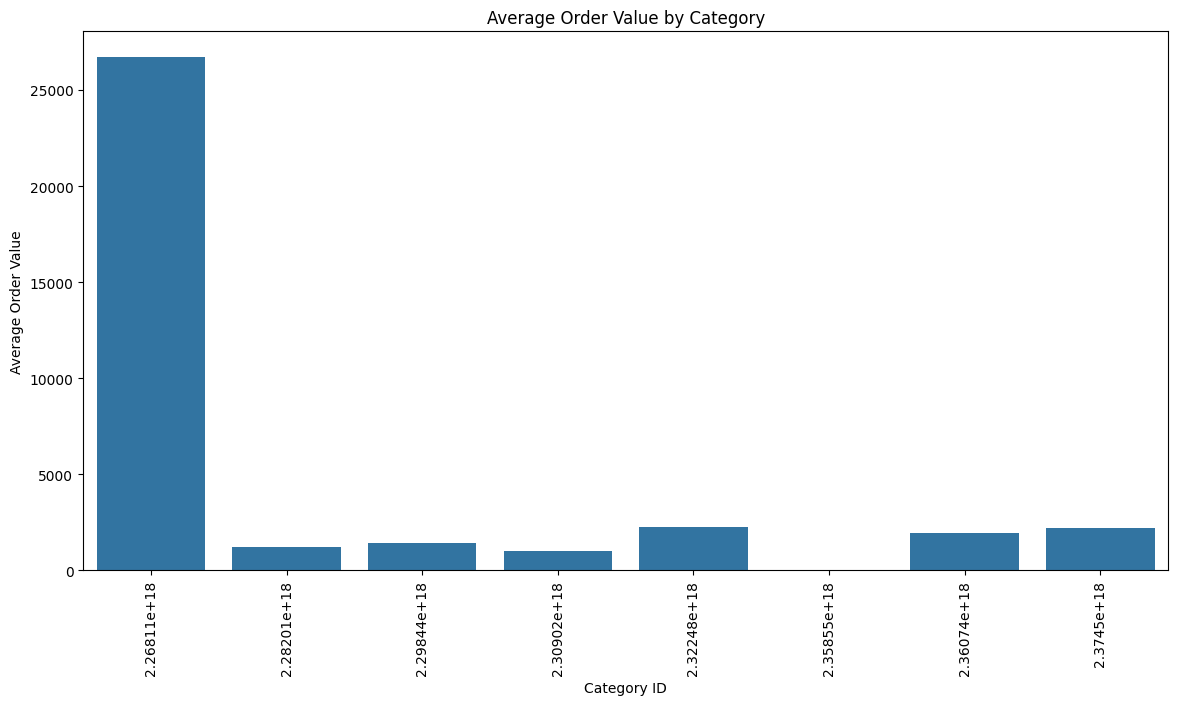

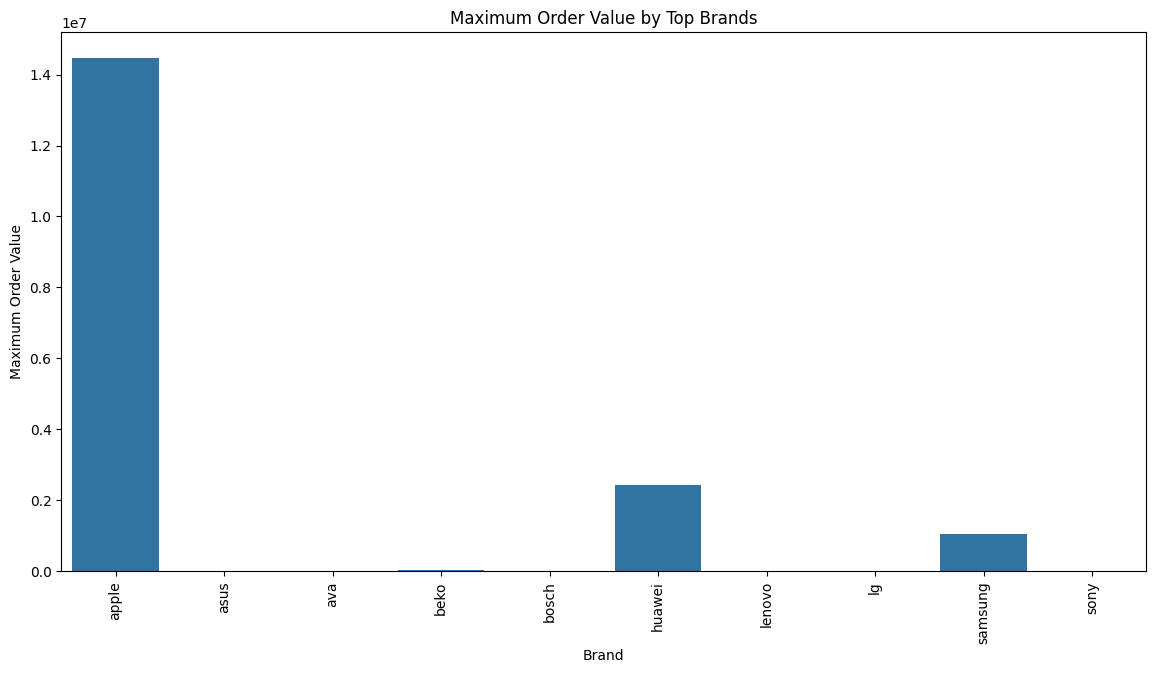

In [1]:
#Transactional Data
#To analyze the average order values across different categories and the maximum order value by the top brands
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'ecommerce_data.csv' with your actual file path)
df = pd.read_csv('C:/Users/HKD81/Desktop/E-commerce Analytics project/Data/kz.csv')

# Convert event_time to datetime format (if needed)
df['event_time'] = pd.to_datetime(df['event_time'])

# Calculate total order value per order_id
order_totals = df.groupby('order_id').agg({
    'price': 'sum',  # Total order value
    'category_id': 'first',  # Assuming each order has a primary category
    'brand': 'first'  # Assuming each order has a primary brand
}).reset_index()

# Calculate average order value per category
category_avg_order_value = order_totals.groupby('category_id')['price'].mean().reset_index()
category_avg_order_value.columns = ['category_id', 'avg_order_value']

# Calculate maximum order value per brand
brand_max_order_value = order_totals.groupby('brand')['price'].max().reset_index()
brand_max_order_value.columns = ['brand', 'max_order_value']

# Identify top brands based on total sales
top_brands = df.groupby('brand')['price'].sum().nlargest(10).index
top_brand_max_order_value = brand_max_order_value[brand_max_order_value['brand'].isin(top_brands)]

# Plot the average order value by category
plt.figure(figsize=(14, 7))
sns.barplot(x='category_id', y='avg_order_value', data=category_avg_order_value)
plt.title('Average Order Value by Category')
plt.xlabel('Category ID')
plt.ylabel('Average Order Value')
plt.xticks(rotation=90)
plt.show()

# Plot the maximum order value by top brands
plt.figure(figsize=(14, 7))
sns.barplot(x='brand', y='max_order_value', data=top_brand_max_order_value)
plt.title('Maximum Order Value by Top Brands')
plt.xlabel('Brand')
plt.ylabel('Maximum Order Value')
plt.xticks(rotation=90)
plt.show()

